# Functional API
> 다중 아웃풋 모델, 레이어 공유 모델등과 같이 복잡한 모델을 정의하는데 좋은 방법으로 Functional API는 각 층을 일종의 함수로 정의한다.  

-> Sequential API로 만든 모델은 직관적이고 편리하지만, 단순히 층을 쌓는 방법이지만 Functional API는 여러 연산자들을 사용하여 신경망을 설계한다.

## Functional API 사용 방법
1. 세션 초기화
    - keras.backend.clear_session()
2. Input, hidden layers, output 작성
    - Input 함수의 입력 크기를 정의
    - 이전층을 다음층 함수의 입력으로 사용하고 변수에 할당
3. 모델선언
    - Model 함수에 입력과 출력을 정의
4. 모델 compile
    - loss, metrics, optimizer사용

In [13]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [16]:
import pandas as pd
import numpy as np


In [14]:
x = data.data
y = data.target

In [23]:
df = pd.DataFrame(x, columns= data.feature_names)

In [24]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
set(y)

{0, 1}

In [28]:
x.shape, y.shape

((569, 30), (569,))

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
# 전처리1 : one-hot encoding
len_y = len(set(y_train))

In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

In [33]:
x_train.shape, y_train.shape

((398, 30), (398, 2))

In [34]:
# 모델 만들기 : Functional API
# 1. 세션초기화
keras.backend.clear_session()

# 2. Input, hidden layers, output 작성
il = keras.layers.Input(shape=(30,))
hl1 = keras.layers.Dense(256, activation = 'relu')(il)
hl2 = keras.layers.Dense(256, activation = 'relu')(hl1)
hl3 = keras.layers.Dense(256, activation = 'relu')(hl2)
ol = keras.layers.Dense(2, activation='sigmoid')(hl3)

# 3. model 선언
model = keras.Model(il, ol)

In [35]:
# 4. compile
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 5. 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 140,034
Trainable params: 140,034
Non-trainable params: 0
_________________________________________________________________


In [37]:
# EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',             # 관측대상
                   min_delta=0,                    # Threshold
                   patience=7,                     # 성능이 개선되지 않으면 기다리는 카운트 수
                   verbose=1,
                   restore_best_weights=True)      # 관측대상으로 지정한 것의 성능이 가장 좋았던 epochs의 가중치를 사용한다.

In [38]:
# model 학습
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[es], epochs=1000, verbose=1)

Epoch 1/1000
10/10 [==============================] - 2s 41ms/step - loss: 22.0245 - accuracy: 0.4151 - val_loss: 4.7482 - val_accuracy: 0.4000
Epoch 2/1000
10/10 [==============================] - 0s 11ms/step - loss: 6.5437 - accuracy: 0.5912 - val_loss: 7.2205 - val_accuracy: 0.4000
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 3.0541 - accuracy: 0.7547 - val_loss: 1.8161 - val_accuracy: 0.7625
Epoch 4/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.1613 - accuracy: 0.8553 - val_loss: 0.1067 - val_accuracy: 0.9750
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.7110 - accuracy: 0.8616 - val_loss: 0.1019 - val_accuracy: 0.9625
Epoch 6/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.4079 - accuracy: 0.9057 - val_loss: 0.1183 - val_accuracy: 0.9500
Epoch 7/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.5002 - accuracy: 0.8553 - val_loss: 0.3636 - val_accuracy: 0.9000

In [41]:
performance_test = model.evaluate(x_test, y_test)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9357
Test Loss : 0.183503,  Test Accuracy : 93.567%


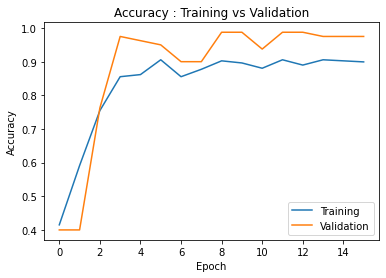

In [43]:
import matplotlib.pyplot as plt

if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

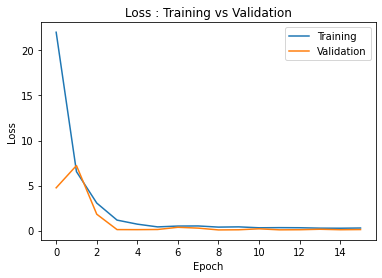

In [44]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(y_train.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(y_test.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

6/6 [==============================] - 0s 3ms/step
트레이닝 정확도 : 92.46%
테스트 정확도 : 93.57%
